# Dempster-Shafer Inference Algorithm


In [1]:
from datetime import datetime
import os
import time
import pandas as pd
import numpy as np
import sys

# Adjust the path to include the directory where config.py is located
sys.path.insert(0, "../src")

from config.config import *
from DS import DempsterShafer
from utilities.data_process.csv_formatter import CSVDataFormatter
from utilities.data_process.time_functions import *

# from utilities.data_process.DSI_data_preparation import *
from hypotheses_manager import HypothesesManager
from utilities.feature_manager import FeatureMatrixManager
from utilities.sampling_manager import SamplingMatrixManager

## Download data


In [2]:
test_name = "multiple_test_ID0_10-18_30-4"
fault = "Multiple"

## Process data


In [3]:
test_cases = {
    "Normal operation": [
        [["S1", "S2", "S3", "S4"], ["29-04-2024 01:00:00", "29-04-2024 01:30:00"]]
    ],
    "Voltage 3.5V": [[["S1"], ["29-04-2024 01:30:00", "29-04-2024 02:00:00"]]],
    "Voltage 3.8V": [[["S1"], ["29-04-2024 02:00:00", "29-04-2024 02:20:00"]]],
    "Voltage 4.0V": [[["S1"], ["29-04-2024 02:25:00", "29-04-2024 02:40:00"]]],
    "Voltage 4.2V": [
        # [["S1"], ["29-04-2024 02:30:00", "29-04-2024 03:00:00"]],
        [["S1"], ["29-04-2024 02:40:00", "29-04-2024 03:00:00"]],
    ],
    "Overheat": [[["S3"], ["29-04-2024 02:10:00", "29-04-2024 03:00:00"]]],
    "Aerosol": [
        [["S4"], ["29-04-2024 02:25:00", "29-04-2024 02:45:00"]],
    ],
    "Overheat and Voltage 3.5V": [
        [["S1"], ["29-04-2024 03:00:00", "29-04-2024 03:20:00"]],
    ],
    "Overheat and Voltage 3.8V": [
        [["S1"], ["29-04-2024 03:20:00", "29-04-2024 03:40:00"]],
    ],
    "Aerosol and Voltage 3.5V": [
        [["S1"], ["29-04-2024 04:00:00", "29-04-2024 04:20:00"]],
    ],
    "Aerosol and Voltage 3.8V": [
        [["S1"], ["29-04-2024 03:45:00", "29-04-2024 04:00:00"]],
    ],
    "Communication": [[[None], [None, None]]],
    # "Uncertain": [[[None], [None, None]]],
}

sampling = [["S1", "S2", "S3", "S4"], ["28-04-2024 21:00:00", "28-04-2024 23:02:00"]]

is_uncertain = False
uncertain_hypothsis = "Uncertain"
if uncertain_hypothsis in list(test_cases.keys()):
    is_uncertain = True

DSI_hypotheses = HypothesesManager(hypothesis_list=hypotheses)
DSI_hypotheses.populate_info("time", test_cases)
DSI_hypotheses.populate_info("color", hypotheses_colors)
DSI_hypotheses.activation("time")
print(DSI_hypotheses.test_hypotheses)
print(DSI_hypotheses.extract_values("time"))
print("Here", DSI_hypotheses.get_hypotheses_info("time"))
print("Here", DSI_hypotheses.get_hypotheses_info("color"))

{'Normal operation': 'N0', 'Normal as Sensor 1': 'N1', 'Normal as Sensor 2': 'N2', 'Normal as Sensor 3': 'N3', 'Normal as Sensor 4': 'N4', 'Voltage 3.5V': 'F_V3_5', 'Voltage 3.8V': 'F_V3_8', 'Voltage 4.0V': 'F_V4_0', 'Voltage 4.2V': 'F_V4_2', 'Overheat': 'F_H', 'Aerosol': 'F_A', 'Overheat and Voltage 3.5V': 'F_H_V3_5', 'Overheat and Voltage 3.8V': 'F_H_V3_8', 'Aerosol and Voltage 3.5V': 'F_D_V3_5', 'Aerosol and Voltage 3.8V': 'F_D_V3_8', 'Communication': 'F_Com', 'Uncertain': 'F_X'}
HypothesesManager:  {'original': {'Normal': {'Normal operation': 'N0', 'Normal as Sensor 1': 'N1', 'Normal as Sensor 2': 'N2', 'Normal as Sensor 3': 'N3', 'Normal as Sensor 4': 'N4'}, 'Voltage': {'Voltage 3.5V': 'F_V3_5', 'Voltage 3.8V': 'F_V3_8', 'Voltage 4.0V': 'F_V4_0', 'Voltage 4.2V': 'F_V4_2'}, 'Overheat': 'F_H', 'Aerosol': 'F_A', 'Compound': {'Overheat and Voltage 3.5V': 'F_H_V3_5', 'Overheat and Voltage 3.8V': 'F_H_V3_8', 'Aerosol and Voltage 3.5V': 'F_D_V3_5', 'Aerosol and Voltage 3.8V': 'F_D_V3_8'}

### Sampling data


#### Sampling data


In [4]:

csv_file_dir = "../data/{}/raw"
samp_mat_manager = SamplingMatrixManager(sampling)
samp_mat_manager.process_hypotheses(csv_file_dir, parameter_headers)
# print(samp_mat_manager.get_sampling_matrix())
sampling_matrix = samp_mat_manager.get_sampling_matrix()
# print("Sampling Matrix", sampling_matrix)
sampling_indexes = samp_mat_manager.get_sampling_indexes()
# print("Sampling Matrix Shape", indexes["S1"])
# print("Sampling Matrix Shape", indexes["S1"])

Sensors1 ['S1', 'S2', 'S3', 'S4']
Start Time 28-04-2024 21:00:00
End Time 28-04-2024 23:02:00
File path: ../data/20240428/raw\20240428_UTS1.csv
Reading file: ../data/20240428/raw\20240428_UTS1.csv
File path: ../data/20240428/raw\20240428_UTS2.csv
Reading file: ../data/20240428/raw\20240428_UTS2.csv
File path: ../data/20240428/raw\20240428_UTS3.csv
Reading file: ../data/20240428/raw\20240428_UTS3.csv
File path: ../data/20240428/raw\20240428_UTS4.csv
Reading file: ../data/20240428/raw\20240428_UTS4.csv


### Feature matrix


In [5]:
# print(DSI_hypotheses.get_hypotheses_info("time"))

feat_matrix_manager = FeatureMatrixManager(DSI_hypotheses.get_hypotheses_info("time"))
hypotheses_names = DSI_hypotheses.get_feature_mat_hypothesis()
print(hypotheses_names)
# csv_file_dir = "../data/{}/processed"
feat_matrix_manager.process_hypotheses(
    hypotheses_names, csv_file_dir, parameters=parameter_headers
)

['Normal operation', 'Voltage 3.5V', 'Voltage 3.8V', 'Voltage 4.0V', 'Voltage 4.2V', 'Overheat', 'Aerosol', 'Overheat and Voltage 3.5V', 'Overheat and Voltage 3.8V', 'Aerosol and Voltage 3.5V', 'Aerosol and Voltage 3.8V']


#### Normal operation


#### Faulty operation


In [6]:
# Loss of communication
small_number = 10e-6  # Define the small number you want to use

feat_mat_fault_com = np.full((1, len(parameter_headers)), small_number)
feat_matrix_manager.input_feature_vector("Communication", feat_mat_fault_com)

### Final feature matrix


In [7]:

feat_mat = feat_matrix_manager.get_features_matrix()
print("Feature matrix: ", feat_mat)
# print("Shape of Feature matrix: ", feat_mat.shape[0])

Features Matrix Dict {'Normal operation': array([47.1827381 , 29.39238095,  3.07672024,  2.61964286,  4.51308333]), 'Voltage 3.5V': array([47.88461538, 28.68461538,  8.22346154,  5.20769231, 14.46769231]), 'Voltage 3.8V': array([45.1875  , 30.075   , 13.671875,  9.3     , 20.6475  ]), 'Voltage 4.0V': array([40.125   , 32.65    , 30.933125, 18.85    , 44.82375 ]), 'Voltage 4.2V': array([38.4   , 33.55  ,  9.845 ,  6.33  , 17.0115]), 'Overheat': array([14.06  , 54.084 ,  3.775 ,  3.5   ,  4.4388]), 'Aerosol': array([ 45.4  ,  30.18 ,  95.532,  79.5  , 107.181]), 'Overheat and Voltage 3.5V': array([36.33333333, 32.83333333,  6.685     ,  5.16666667,  9.27611111]), 'Overheat and Voltage 3.8V': array([35.95  , 31.97  ,  5.4335,  4.32  ,  7.6025]), 'Aerosol and Voltage 3.5V': array([40.15 , 29.57 , 11.478,  7.83 , 14.341]), 'Aerosol and Voltage 3.8V': array([37.92857143, 30.44285714,  8.075     ,  5.77142857, 10.60928571]), 'Communication': array([[1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05]])}


## DSI


### Initialization


In [8]:

test_hypotheses = DSI_hypotheses.get_test_hypotheses()
sampling_freq = [1]
print(test_hypotheses)


['Normal operation', 'Voltage 3.5V', 'Voltage 3.8V', 'Voltage 4.0V', 'Voltage 4.2V', 'Overheat', 'Aerosol', 'Overheat and Voltage 3.5V', 'Overheat and Voltage 3.8V', 'Aerosol and Voltage 3.5V', 'Aerosol and Voltage 3.8V', 'Communication']


### Execution


In [9]:
from itertools import islice

DSI_results = {}

for sensor, data in sampling_matrix.items():
    print("AA", sensor)
    # print(data)
    for freq in sampling_freq:
        DSI_results[f"{sensor}_{freq}"] = (
            pd.DataFrame()
        )  # Adjusted to include freq in key
        for i in range(0, len(data), freq):
            if i + freq > len(data):  # Check to avoid index out of range
                break
            sampling_rows = data[
                i : i + freq
            ]  # Select the desired number of rows based on freq
            # sampling_mat = sampling_rows.reshape((freq, len(parameter_headers)))  # Adjust reshape according to freq
            sampling_mat = sampling_rows.to_numpy()
            # print("Sampling Matrix", sampling_mat)
            ds = DempsterShafer(feat_mat, sampling_mat, is_uncertain=is_uncertain)
            ds.hypothesis_order(test_hypotheses)
            reliability = ds.result()

            # Concatenate the reliability results for the current freq to its DataFrame
            DSI_results[f"{sensor}_{freq}"] = pd.concat(
                [DSI_results[f"{sensor}_{freq}"], reliability],
                axis=0,
                ignore_index=True,
            )

# print("AB", DSI_results['20240316_UTS1'])
# first_key = list(DSI_results.keys())[0]
# first_value = DSI_results[first_key]
# print(first_key, first_value)
print(DSI_results)

AA S1
AA S2
AA S3
AA S4
{'S1_1':     Normal operation  Voltage 3.5V  Voltage 3.8V  Voltage 4.0V  Voltage 4.2V  \
0           0.000888      0.995232  2.420493e-04  4.170782e-06  6.734269e-04   
1           0.000003      0.999980  3.031003e-07  1.037428e-08  2.511293e-07   
2           0.122448      0.868304  1.667860e-03  1.192151e-04  4.068158e-04   
3           0.000936      0.992555  4.423350e-03  9.432970e-06  2.455996e-04   
4           0.003834      0.994489  6.012282e-05  2.800128e-06  2.001937e-05   
..               ...           ...           ...           ...           ...   
56          0.000209      0.000630  9.487161e-01  6.546349e-04  2.845950e-02   
57          0.055214      0.001853  1.101921e-03  3.386723e-03  2.955632e-01   
58          0.014765      0.000097  7.085725e-05  2.452443e-04  1.758855e-02   
59          0.028633      0.001479  1.118518e-03  3.922027e-03  2.708511e-01   
60          0.002239      0.000133  1.089049e-04  7.767984e-04  3.262047e-03   

      

# Result visualization


In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from utilities.plot_functions import *

## Prepare result


## Reliability probability


### Initialization


In [11]:
sensor_colors = {"S1": "blue", "S2": "orange", "S3": "green", "S4": "red"}
# Define a color palette with 7 colors
# colors = sns.color_palette("Spectral", n_colors=7)
colors = [hypotheses_colors[hypothesis] for hypothesis in test_hypotheses]
print("Colors", colors)
indexes = sampling_indexes["S3"]

Colors [(0.04359861591695502, 0.4648212226066897, 0.20369088811995387), (0.7709803921568628, 0.2541176470588235, 0.007058823529411764), (0.9545098039215686, 0.44, 0.10666666666666666), (0.9921568627450981, 0.6564705882352941, 0.3827450980392157), (0.9937254901960785, 0.8501960784313726, 0.7043137254901961), 'red', 'blue', (0.8878431372549019, 0.8847058823529411, 0.9372549019607843), (0.7137254901960784, 0.7137254901960784, 0.8470588235294118), (0.5254901960784314, 0.5129411764705882, 0.7403921568627451), (0.3811764705882353, 0.25176470588235295, 0.6078431372549019), 'black']


#### Stacked plot for probability assignment


Min max 2024-04-28 11:00:00+00:00 2024-04-28 13:00:00+00:00
Min max 2024-04-28 11:00:00+00:00 2024-04-28 13:00:00+00:00
Min max 2024-04-28 11:00:00+00:00 2024-04-28 13:00:00+00:00
Min max 2024-04-28 11:00:00+00:00 2024-04-28 13:00:00+00:00


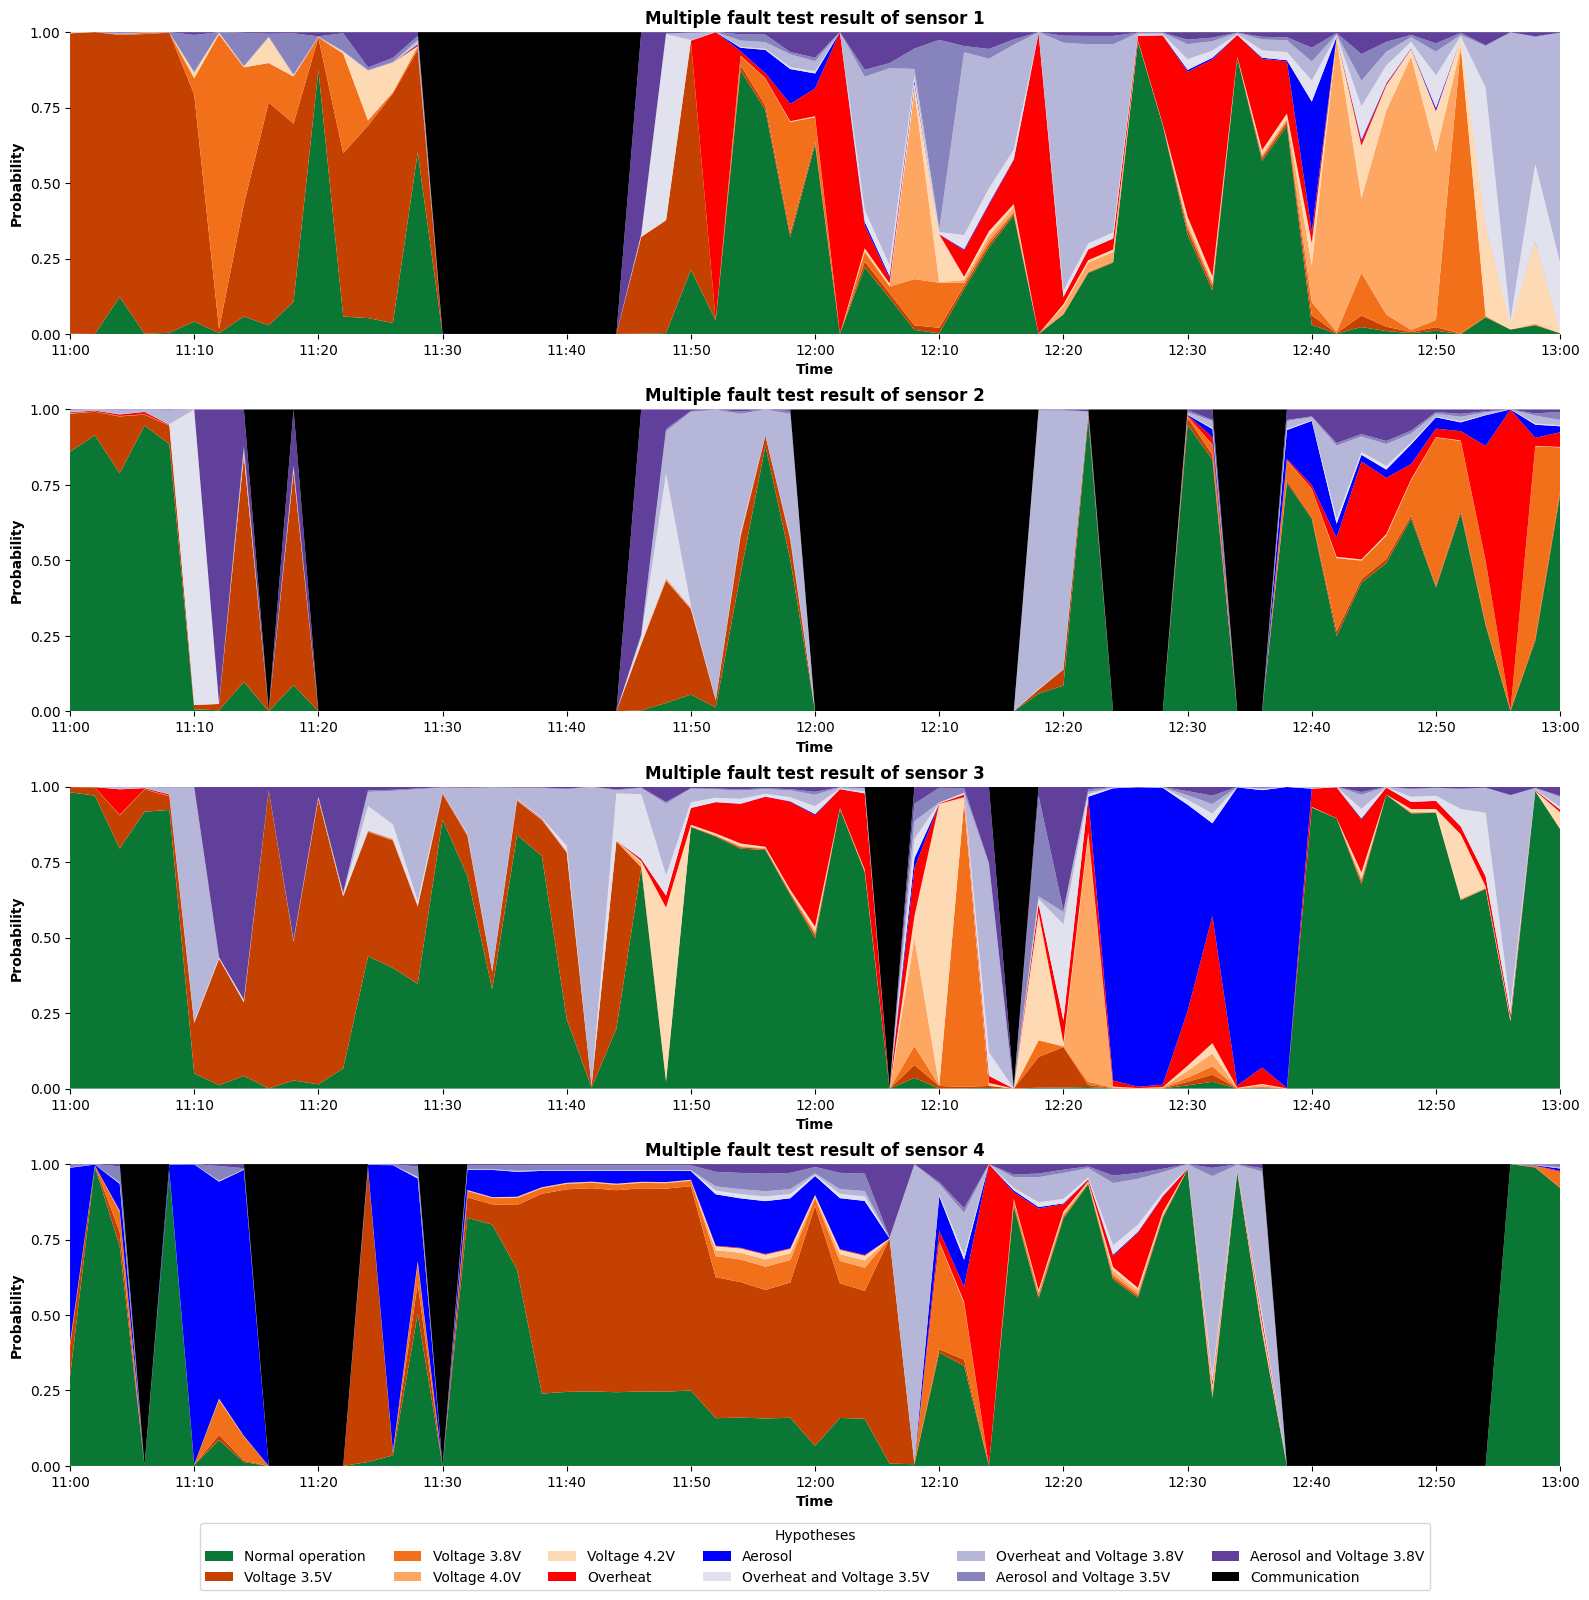

In [12]:
# Create subplots
# Determine number of subplots based on the number of items in DSI_results
n_subplots = len(DSI_results)
fig, axs = plt.subplots(n_subplots, 1, figsize=(16, 4 * n_subplots))
# Ensure `axs` is iterable (important if there's only one subplot)
if n_subplots == 1:
    axs = [axs]

count = 1
# print(DSI_results.items())
for ax, (key, value) in zip(axs, DSI_results.items()):
    plot_stacked_area_chart(ax, (key, value), indexes, colors, minute_locator=10)
    ax.set_title(f"{fault} fault test result of sensor {count}", fontweight="bold")
    ax.set_xlabel("Time", fontweight="bold")
    ax.set_ylabel("Probability", fontweight="bold")
    ax.margins(0.00,0.00)
    count += 1
# Remove spaces between subplots

# plt.subplots_adjust(hspace=0.2)

plt.legend(
    loc="center",
    bbox_to_anchor=(0.5, -0.3),
    title="Hypotheses",
    ncols=len(DSI_hypotheses.get_test_hypotheses()) / 2,
)
# Show the plot
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.25)

# Save and show the figure
plt.show()
fig.savefig(
    f"../fig/Faults/Individual/S1/{fault}/DSI_results_{test_name}.png",
    bbox_inches="tight",
)


#### Line graph for normal operation probability


In [13]:
# Prepare data for normal operation reliability plot
reliability_comparison = pd.DataFrame()
print(reliability_comparison)
for i, (sensor, data) in enumerate(DSI_results.items()):
    print("AA", sensor)
    reliability_comparison = pd.concat([reliability_comparison, data.iloc[:, 0]], axis=1)
    reliability_comparison = reliability_comparison.rename(columns={reliability_comparison.columns[-1]: f'{sensor[:-2]}'})

reliability_comparison = reliability_comparison.set_index(indexes)
reliability_comparison['Highest Reliability'] = reliability_comparison.idxmax(axis=1)
# print(reliability_comparison)

Empty DataFrame
Columns: []
Index: []
AA S1_1
AA S2_1
AA S3_1
AA S4_1


../src\utilities\plot_functions.py:108: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  task = data[task_assign_col][i]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15800\38174900.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


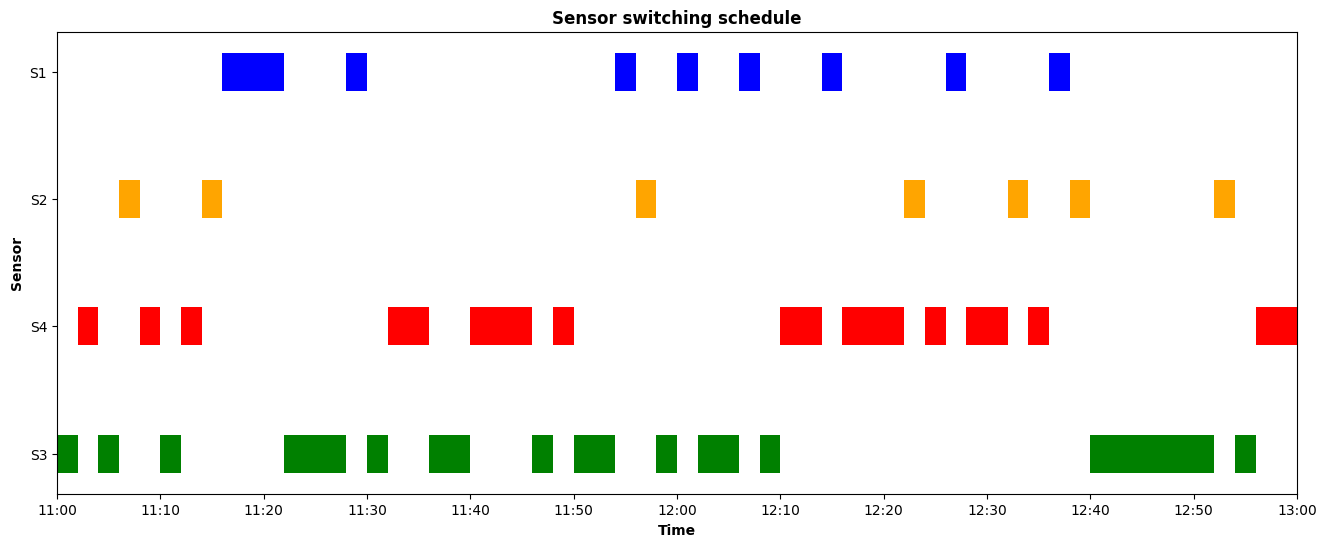

In [14]:
fig, ax = plot_gantt_chart(
    reliability_comparison, "Highest Reliability", sensor_colors, minute_locator=10
)
# Modify the title using the Axes object
ax.set_title("Sensor switching schedule", fontweight="bold")
ax.set_xlabel("Time", fontweight="bold")
ax.set_ylabel("Sensor", fontweight="bold")
ax.margins(x=0.01,y=0.05)
# ax.legend(loc="upper left", ncol=1)
fig.show()
fig.savefig(
    f"../fig/Faults/Individual/S1/{fault}/switching_{test_name}.png",
    bbox_inches="tight",
)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15800\2837193128.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


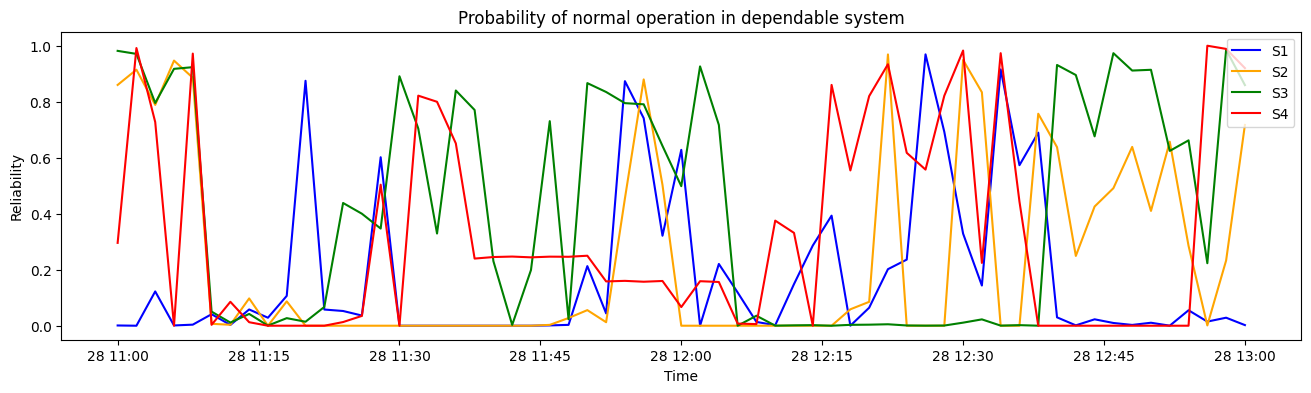

In [15]:
# Plot the reliability comparison
fig, ax = plot_line_graph_df(
    reliability_comparison,
    y_columns=reliability_comparison.columns[:-1],
    title="Reliability Comparison",
    xlabel="Time",
    ylabel="Reliability",
    color=list(sensor_colors.values()),
    figsize=(16, 4)
)
# Modify the title using the Axes object
ax.set_title("Probability of normal operation in dependable system")
ax.legend(loc="upper right", ncol=1)
fig.show()
fig.savefig(
    f"../fig/Faults/Individual/S1/{fault}/reliability_{test_name}.png",
    bbox_inches="tight",
)

#### Line graph for continuous data flow


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15800\303298196.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


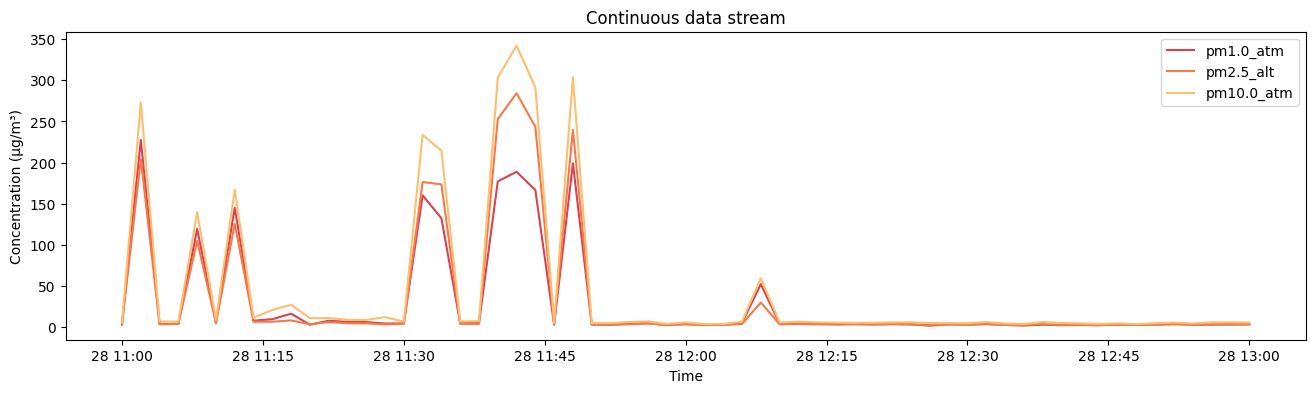

In [16]:
# Prepare data for continuous data flow
# Initialize an empty DataFrame to store the plot data
plot_data = pd.DataFrame()
# print("Plot data", plot_data)
# Iterate through each timestamp
for timestamp, row in reliability_comparison.iterrows():
    # print("Timestamp", timestamp)
    # print("Row", row)
    sensor = row["Highest Reliability"]
    # print("Sensor", sensor)
    sensor_data = sampling_matrix[sensor].loc[
        [timestamp]
    ]  # Use double brackets to keep DataFrame format
    # print("Sensor Data", sensor_data)
    plot_data = pd.concat([plot_data, sensor_data])
    # print("Plot data", plot_data)

# print("Plot data", plot_data)
colors = sns.color_palette("Spectral", n_colors=8)
fig, ax = plot_line_graph_df(
    plot_data,
    y_columns=["pm1.0_atm", "pm2.5_alt", "pm10.0_atm"],
    title="Continuous data stream",
    xlabel="Time",
    ylabel="Concentration (μg/m³)",
    color=colors,
    figsize=(16, 4),
)
# Modify the title using the Axes object
ax.legend(loc="upper right", ncol=1)
fig.show()
fig.savefig(
    f"../fig/Faults/Individual/S1/{fault}/datastream_{test_name}.png",
    bbox_inches="tight",
)